1. Design a NLP model on Sarcasm detection.

Electronic journalism powered with Social media has become one of the major sources of information consumption lately. Many media houses are using creative ways in order to tap into increasing views on posts. One of the ways is using sarcastic headlines as click baits. A model that is able to predict whether a piece of headline is sarcastic or not can be useful for media houses in order to analyse their quarterly earnings by strategy. Also, from a reader's perspective, search engines can utilise this information of sarcasm and depending on the reader’s preference, recommend similar articles to them.

	The goal is to build a ANN model to detect whether a sentence is sarcastic or not?

	https://github.com/Kavitha-Kothandaraman/Sarcasm-Detection-NLP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import nltk
import re
import re,string,unicodedata
from nltk.corpus import stopwords

from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
df

is_sarcastic                                           headline  \
0                 1  thirtysomething scientists unveil doomsday clo...   
1                 0  dem rep. totally nails why congress is falling...   
2                 0  eat your veggies: 9 deliciously different recipes   
3                 1  inclement weather prevents liar from getting t...   
4                 1  mother comes pretty close to using word 'strea...   
...             ...                                                ...   
28614             1       jews to celebrate rosh hashasha or something   
28615             1  internal affairs investigator disappointed con...   
28616             0  the most beautiful acceptance speech this week...   
28617             1  mars probe destroyed by orbiting spielberg-gat...   
28618             1                 dad clarifies this not a food stop   

                                            article_link  
0      https://www.theonion.com/thirtysomething-scien...  
1      https://www.huffingtonpost.com/entry/donna-edw...  
2      https://www.huffingtonpost.com/entry/eat-your-...  
3      https://local.theonion.com/inclement-weather-p...  
4      https://www.theonion.com/mother-comes-pretty-c...  
...                                                  ...  
28614  https://www.theonion.com/jews-to-celebrate-ros...  
28615  https://local.theonion.com/internal-affairs-in...  
28616  https://www.huffingtonpost.com/entry/andrew-ah...  
28617  https://www.theonion.com/mars-probe-destroyed-...  
28618  https://www.theonion.com/dad-clarifies-this-no...  

[28619 rows x 3 columns]

In [ ]:
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [ ]:
df.shape

(28619, 3)

In [ ]:
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [ ]:
df.describe(include='object')

headline  \
count                                               28619   
unique                                              28503   
top     'no way to prevent this,' says only nation whe...   
freq                                                   12   

                                             article_link  
count                                               28619  
unique                                              28617  
top     https://politics.theonion.com/nation-not-sure-...  
freq                                                    2

In [ ]:
df['headline'].duplicated().sum()

116

In [ ]:
df=df.drop(df[df['headline'].duplicated()].index,axis=0)

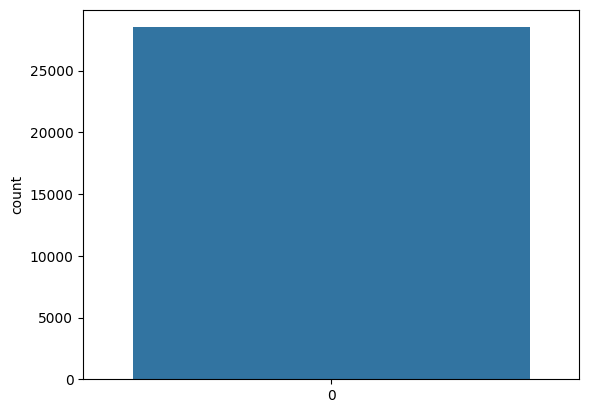

In [ ]:
sns.countplot(df['is_sarcastic']);

In [ ]:
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

#Removing the stopwords from text
def split_into_words(text):
    # split into words by white space
    words = text.split()
    return words

def to_lower_case(words):
    # convert to lower case
    words = [word.lower() for word in words]
    return words

def remove_punctuation(words):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in words]
    return stripped

def keep_alphabetic(words):
    # remove remaining tokens that are not alphabetic
    words = [word for word in words if word.isalpha()]
    return words

def remove_stopwords(words):
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

def to_sentence(words):
    # join words to a sentence
    return ' '.join(words)

#Removing the noisy text
def denoise_text(text):
    words = split_into_words(text)
    words = to_lower_case(words)
    words = remove_punctuation(words)
    words = keep_alphabetic(words)
    words = remove_stopwords(words)
    return to_sentence(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['headline']=df['headline'].apply(denoise_text)

In [ ]:
labels = (df['is_sarcastic'])
data = (df['headline'])

In [ ]:
train_ratio = 0.80

train_size = int(len(labels)*train_ratio)

train_data = data[:train_size]
train_labels= labels[:train_size]

test_data = data[train_size:]
test_labels = labels[train_size:]

In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train_data)

vocab_size = len(tokenizer.word_index)
print(vocab_size)

train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

25662


In [ ]:
maxlen=max([len(i) for i in train_sequences])

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=maxlen,  padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen,  padding='post')

In [ ]:
index = 10
print(f'sample headline: {train_sequences[index]}')
print(f'padded sequence: {train_padded[index]} \n')

print(f'Original Sentence:  \n {tokenizer.sequences_to_texts(train_sequences[index:index+1])} \n')

# Print dimensions of padded sequences
print(f'shape of padded sequences: {train_padded.shape}')

sample headline: [1972, 2572, 315, 3022, 943, 7]
padded sequence: [1972 2572  315 3022  943    7    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0] 

Original Sentence:  
 ['lesbian considered father indiana amazing one'] 

shape of padded sequences: (22802, 106)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1,100,input_length=maxlen),
    tf.keras.layers.Bidirectional( tf.keras.layers.LSTM(128)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 106, 100)          2566300   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [ ]:
history=model.fit(train_padded, np.array(train_labels),validation_data = (test_padded,np.array(test_labels)) , epochs = 5 , verbose=2)

Epoch 1/5
713/713 - 181s - loss: 0.4768 - accuracy: 0.7641 - val_loss: 0.3986 - val_accuracy: 0.8170 - 181s/epoch - 255ms/step
Epoch 2/5
713/713 - 173s - loss: 0.2376 - accuracy: 0.9099 - val_loss: 0.4572 - val_accuracy: 0.8109 - 173s/epoch - 242ms/step
Epoch 3/5
713/713 - 175s - loss: 0.0967 - accuracy: 0.9650 - val_loss: 0.5784 - val_accuracy: 0.7974 - 175s/epoch - 245ms/step
Epoch 4/5
713/713 - 175s - loss: 0.0441 - accuracy: 0.9846 - val_loss: 0.8574 - val_accuracy: 0.7878 - 175s/epoch - 245ms/step
Epoch 5/5
713/713 - 175s - loss: 0.0254 - accuracy: 0.9909 - val_loss: 1.0534 - val_accuracy: 0.7850 - 175s/epoch - 245ms/step


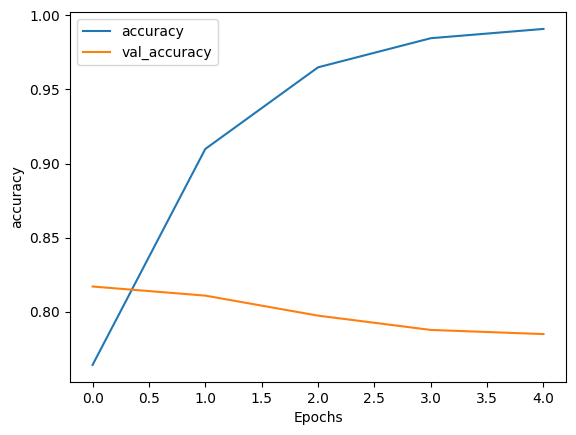

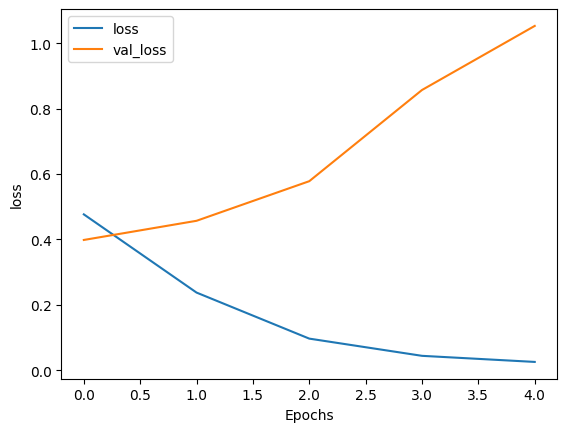

In [ ]:

def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In summary, building a sarcasm detection ANN model involves data preparation, designing a neural network architecture, training, evaluation, and fine-tuning. Success depends on dataset quality, model design, and parameter optimization. Deploy the model for real-world applications once satisfied with the performance.